---

 ## <font color=maroon>Project:</font>   
---
<center><h1><font color=Indigo>Loan Prediction: Predictive models </h1></center>


---

## Problem Statement:
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## 1. Exploratory Data Analysis
Let's check the data files! According to the data description we should find the following columns:
- **Loan_ID**:	Unique Loan ID
- **Gender**:	Male/ Female
- **Married**:	Applicant married (Y/N)
- **Dependents**:	Number of dependents
- **Education**:	Applicant Education (Graduate/ Under Graduate)
- **Self_Employed**:	Self employed (Y/N)
- **ApplicantIncome**:	Applicant income
- **CoapplicantIncome**:	Coapplicant income
- **LoanAmount**:	Loan amount in thousands
- **Loan_Amount_Term**:	Term of loan in months
- **Credit_History**:	credit history meets guidelines
- **Property_Area**:	Urban/ Semi Urban/ Rural
- **Loan_Status**:	(Target) Loan approved (Y/N)

###  Load Libraries

In [1]:
# Importing the required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
# Importing Data
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
sample = pd.read_csv('sample_submission_49d68Cx.csv')

### File structure and content

In [3]:
#finding out the shape of the train data using "shape" variable: Output (rows, columns)
train.shape

(614, 13)

In [4]:
#finding out the shape of the test data using "shape" variable: Output (rows, columns)
test.shape

(367, 12)

In [5]:
# A closer look at the data types present in the train data
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# A closer look at the data types present in the test data
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### Univariate Analysis

### Target Exploration
In this section we will take a look at the Loan_Status which is the target variable. It is crucial to understand it in detail as this is what we are trying to predict accurately.

In [7]:
train['Loan_Status'].value_counts(normalize= True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

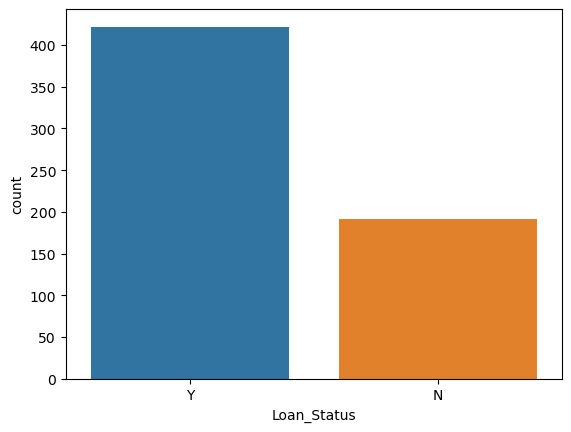

In [8]:
sns.countplot(train['Loan_Status'])

Almost 70 percent loans are approved.

### Independent Variables

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

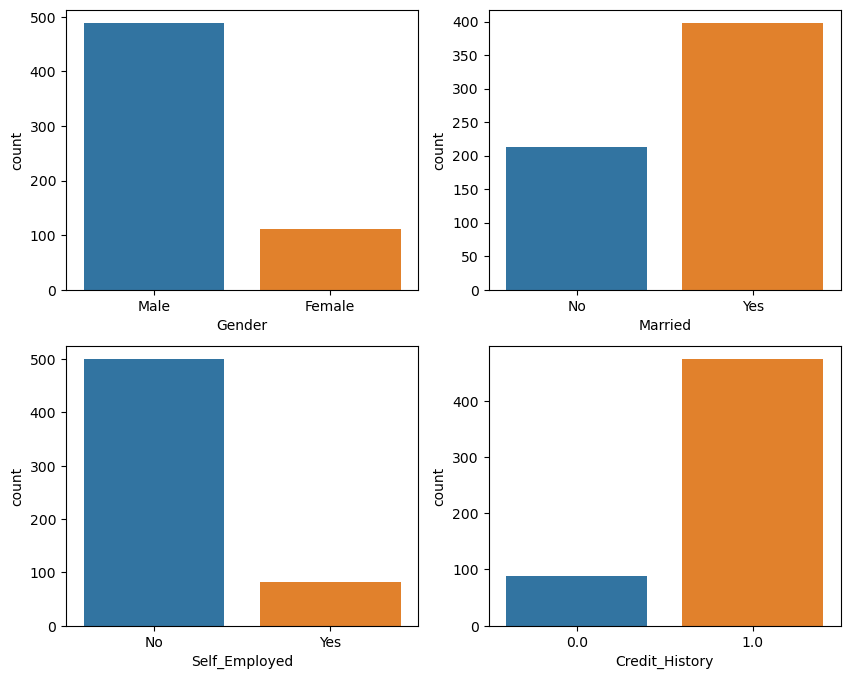

In [9]:
plt.figure(figsize=(10, 8))

plt.subplot(221)
sns.countplot(train['Gender'])

plt.subplot(222)
sns.countplot(train['Married'])

plt.subplot(223)
sns.countplot(train['Self_Employed'])

plt.subplot(224)
sns.countplot(train['Credit_History'])

### Observations:
1. 80% applicants are male.
2. Around 65% of applicants are married.
3. About 15% of applicants are self employed.
4. About 85% of applicants have credit history +1.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

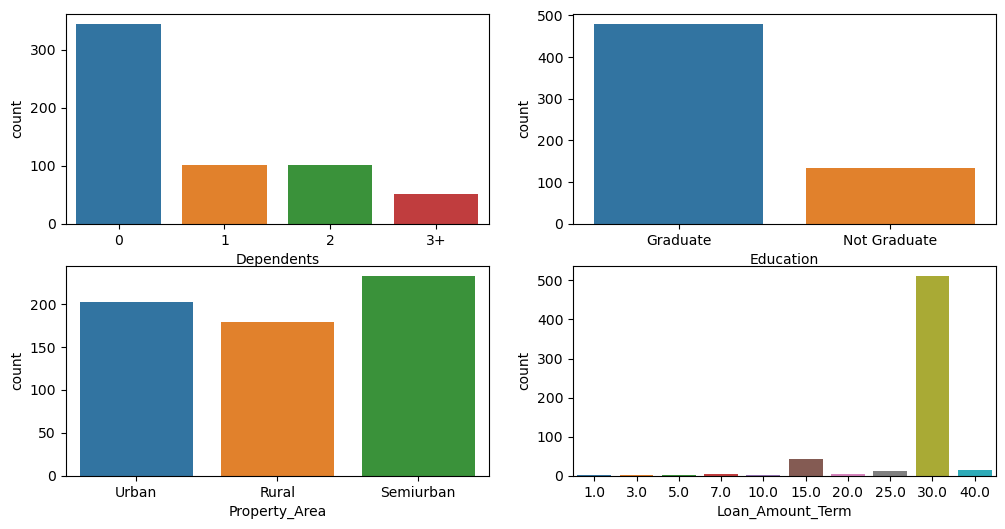

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(221)
sns.countplot(train['Dependents'])

plt.subplot(222)
sns.countplot(train['Education'])

plt.subplot(223)
sns.countplot(train['Property_Area'])

plt.subplot(224)
sns.countplot(train['Loan_Amount_Term']/12)

### Observations:
1. Most of the applicants do not have dependents.
2. Almost 80% applicants are graduates.
3. Applicants from semiurban area are more than rural and urban applicants.
4. Term of the loan is 30 years in most of the cases.  

In [11]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

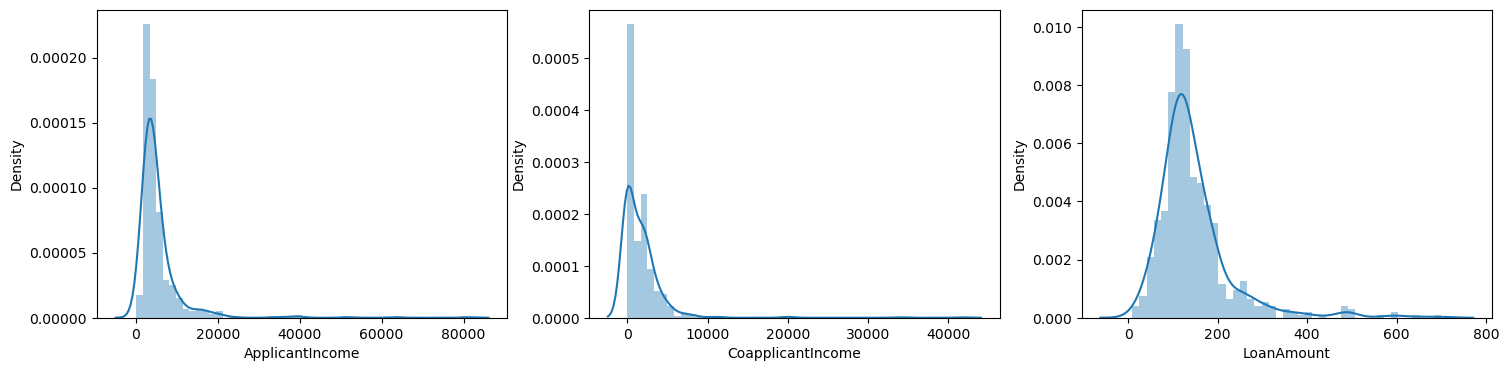

In [12]:
plt.figure(figsize=(18, 4))

plt.subplot(131)
sns.distplot(train['ApplicantIncome'])

plt.subplot(132)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(133)
sns.distplot(train['LoanAmount'])


### Observations:
1. Most of the data in the distribution of applicant income and Coapplicant Income are towards left i.e. not normally distributed. 
2. Loan Amount data is fairly normal in distribution.
3. There are lot of outliers in Loan Amount Data.

### Bivariate Analysis

### Categorical Independent VS Target Variable

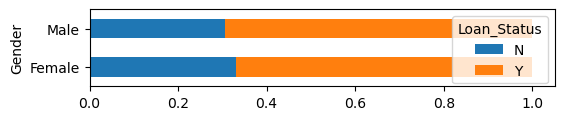

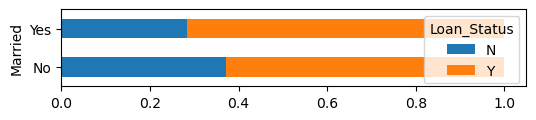

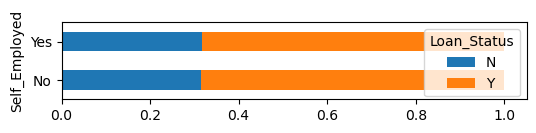

In [13]:
Gender=train.groupby('Gender')['Loan_Status'].value_counts(normalize= True).unstack('Loan_Status').plot.barh(stacked= True, figsize=(6,1))

Married=train.groupby('Married')['Loan_Status'].value_counts(normalize= True).unstack('Loan_Status').plot.barh(stacked= True, figsize=(6,1))

Self_Employed=train.groupby('Self_Employed')['Loan_Status'].value_counts(normalize= True).unstack('Loan_Status').plot.barh(stacked= True, figsize=(6,1))


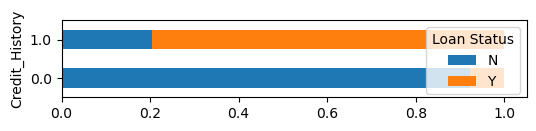

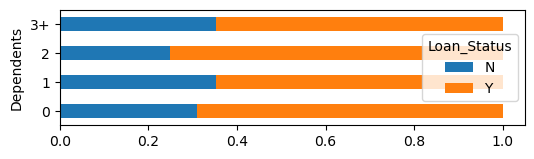

In [14]:
Credit_History=train.groupby('Credit_History')['Loan_Status'].value_counts(normalize= True).unstack('Loan_Status').plot.barh(stacked= True, figsize=(6,1))
plt.legend(loc='upper right', title='Loan Status')

Dependents=train.groupby('Dependents')['Loan_Status'].value_counts(normalize= True).unstack('Loan_Status').plot.barh(stacked= True, figsize=(6,1.5))


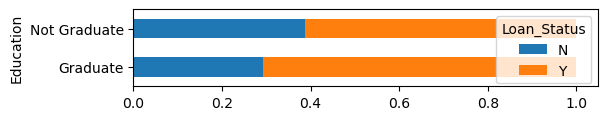

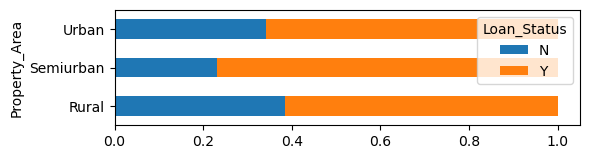

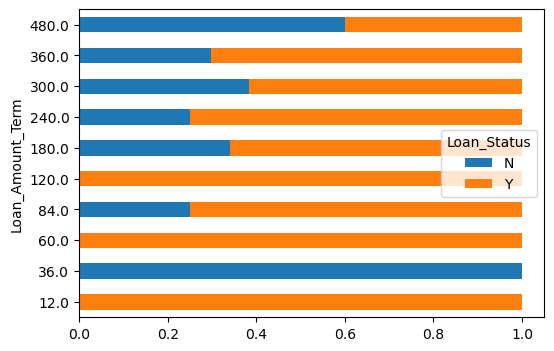

In [15]:
Education=train.groupby('Education')['Loan_Status'].value_counts(normalize= True).unstack('Loan_Status').plot.barh(stacked= True, figsize=(6,1))

Property_Area=train.groupby('Property_Area')['Loan_Status'].value_counts(normalize= True).unstack('Loan_Status').plot.barh(stacked= True, figsize=(6,1.5))

Loan_Amount_Term=train.groupby('Loan_Amount_Term')['Loan_Status'].value_counts(normalize= True).unstack('Loan_Status').plot.barh(stacked= True, figsize=(6,4))

### Observations:
1. Proportion of male and female applicants is almost same for approved loans. 
2. Proportion of married applicants is more than unmarried in approved loans.
3. There is nothing significant observation from loan status of self employed applicants.
4. Chances of loan approval are high in case of applicants with credit history +1.
5. The distribution of applicants with 1 or more than 3 applicants is almost same.
6. Proportion of graduate applicants is more than not graduate applicants in approved loans.
7. Chances of loan approval are more in case of semiurban area than urban and rural property area.

### Numerical Independent VS Target Variable

In [16]:
def ApplicantIncome(x):
    # to calculate what time of it is now
    if x in range(0,2500):
        return 'Low'
    elif x in range(2500,4000):
        return 'Medium'
    elif x in range(4000,6000):
        return 'High'
    else:
        return 'Very_High'

train['ApplicantIncome_group'] = train['ApplicantIncome'].apply(ApplicantIncome)

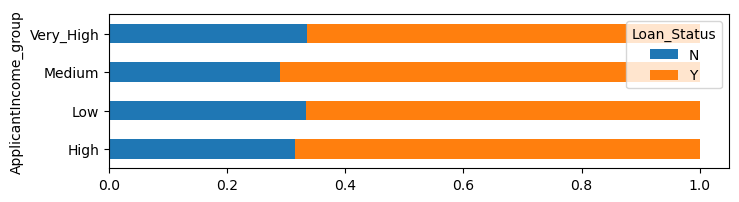

In [17]:
ApplicantIncome_group=train.groupby('ApplicantIncome_group')['Loan_Status'].value_counts(normalize= True).unstack('Loan_Status').plot.barh(stacked= True,figsize=(8,2))

In [18]:
def CoapplicantIncome(x):
    # to calculate what time of it is now
    if x in range(0,1000):
        return 'Low'
    elif x in range(1000,3000):
        return 'Medium'
    else:
        return 'High'

train['CoapplicantIncome_group'] = train['CoapplicantIncome'].apply(CoapplicantIncome)

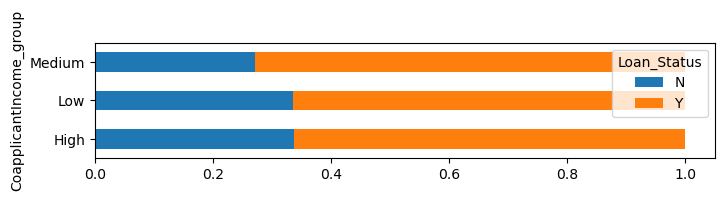

In [19]:
CoapplicantIncome_group=train.groupby('CoapplicantIncome_group')['Loan_Status'].value_counts(normalize= True).unstack('Loan_Status').plot.barh(stacked= True,figsize=(8,1.5))

In [20]:
def Loan(x):
    # to calculate what time of it is now
    if x in range(0,100):
        return 'Low'
    elif x in range(100,200):
        return 'Medium'
    else:
        return 'High'

train['LoanAmount_group'] = train['LoanAmount'].apply(Loan)

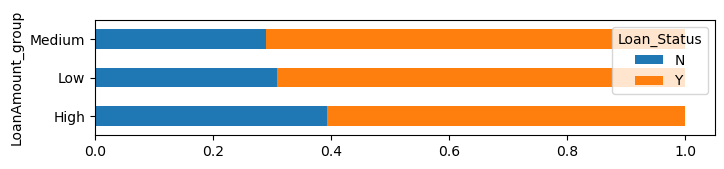

In [21]:
LoanAmount_group=train.groupby('LoanAmount_group')['Loan_Status'].value_counts(normalize= True).unstack('Loan_Status').plot.barh(stacked= True,figsize=(8,1.5))

In [22]:
train['Loan_Status'].replace('N',0, inplace=True)
train['Loan_Status'].replace('Y',1, inplace=True)

In [23]:
table =pd.pivot_table(train, values = ['Loan_Status'], index = ['LoanAmount_group','ApplicantIncome_group', 'CoapplicantIncome_group'], aggfunc = np.mean)
table

Loan_Status
LoanAmount_group ApplicantIncome_group CoapplicantIncome_group             
High             High                  High                        0.615385
                                       Low                         0.333333
                                       Medium                      0.500000
                 Low                   High                        0.200000
                                       Low                         0.333333
                                       Medium                      1.000000
                 Medium                High                        0.666667
                                       Low                         0.500000
                                       Medium                      0.666667
                 Very_High             High                        0.500000
                                       Low                         0.687500
                                       Medium                      0.571429
Low              High                  High                        1.000000
                                       Low                         0.500000
                                       Medium                      1.000000
                 Low                   High                        0.250000
                                       Low                         0.437500
                                       Medium                      0.952381
                 Medium                High                        1.000000
                                       Low                         0.653846
                                       Medium                      0.800000
                 Very_High             Low                         0.857143
                                       Medium                      1.000000
Medium           High                  High                        0.800000
                                       Low                         0.724138
                                       Medium                      0.722222
                 Low                   High                        0.833333
                                       Low                         0.500000
                                       Medium                      0.666667
                 Medium                High                        0.708333
                                       Low                         0.750000
                                       Medium                      0.707865
                 Very_High             High                        0.666667
                                       Low                         0.673469
                                       Medium                      0.600000

### Observations:
1. Applicant's income does not affect the chances of loan approval.
2. Chances of loan approval are slightly high for coapplicant with income range between 1000 to 3000.
3. Chances of loan rejection are slightly high for high amount loan.
4. Applicant's income, coapplicant's income and loan amount collectively affect the chances of loan approval.

In [24]:
train=train.drop(['ApplicantIncome_group','CoapplicantIncome_group','LoanAmount_group'], axis=1)

In [25]:
numerical = train.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status            int64
dtype: object

In [26]:
correlation = numerical.dropna().corr()
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.122631,0.570708,-0.062861,-0.023779,-0.006281
CoapplicantIncome,-0.122631,1.000000,0.159152,-0.000290,-0.010847,-0.043353
LoanAmount,0.570708,0.159152,1.000000,0.023239,-0.018156,-0.036642
Loan_Amount_Term,-0.062861,-0.000290,0.023239,1.000000,0.008658,-0.028601
Credit_History,-0.023779,-0.010847,-0.018156,0.008658,1.000000,0.547439
Loan_Status,-0.006281,-0.043353,-0.036642,-0.028601,0.547439,1.000000


<AxesSubplot:>

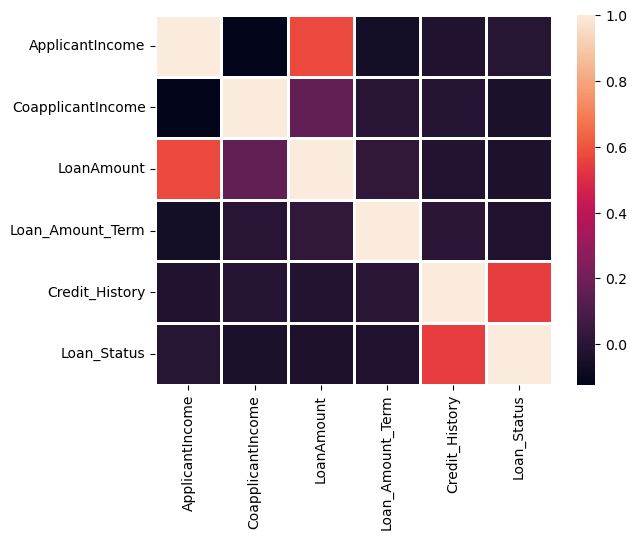

In [27]:
sns.heatmap(correlation, linewidth = 2)

### Observations:
1. Most correlated variables are Applicantincome - LoanAmount and Credit_History - Loan_Status.
2. LoanAmount is correlated with Coapplicant's income.

### Missing Values
Knowing about missing values is important because they indicate how much we don’t know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

In [28]:
# Missing Values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
# Missing Values
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Replace missing values for categorical columns with mode:

In [30]:
train['Gender']= train['Gender'].fillna(train['Gender'].mode()[0])
test['Gender']= test['Gender'].fillna(test['Gender'].mode()[0])

train['Married']= train['Married'].fillna(train['Married'].mode()[0])

train['Dependents']= train['Dependents'].fillna(train['Dependents'].mode()[0])
test['Dependents']= test['Dependents'].fillna(test['Dependents'].mode()[0])

train['Self_Employed']= train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
test['Self_Employed']= test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

Replace missing values for numeric columns with mean:

In [31]:
train['LoanAmount']= train['LoanAmount'].fillna(train['LoanAmount'].mean())
test['LoanAmount']= test['LoanAmount'].fillna(test['LoanAmount'].mean())

train['Loan_Amount_Term']= train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
test['Loan_Amount_Term']= test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())

train['Credit_History']= train['Credit_History'].fillna(train['Credit_History'].mean())
test['Credit_History']= test['Credit_History'].fillna(test['Credit_History'].mean())

In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Feature Engineering

In [34]:
for i in [train]:
    i['Total_income'] = i['ApplicantIncome'] + i['CoapplicantIncome']

train['Loan_per_Total_income'] = train['LoanAmount']/train['Total_income']

In [35]:
for i in [test]:
    i['Total_income'] = i['ApplicantIncome'] + i['CoapplicantIncome']

test['Loan_per_Total_income'] = test['LoanAmount']/test['Total_income']

Here, a new column Loan_per_Total_income is added.

### Evaluation Metrics for Classification
Accuracy score

### Logistic Regression

In [36]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Loan_per_Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0,0.025032
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0,0.024287
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0,0.023500


In [37]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,Loan_per_Total_income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,5720,0.019231
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4576,0.027535
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,6800,0.030588
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4886,0.020467
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,3276,0.023810


In [38]:
train=train.drop(['Loan_ID','Total_income'],1)
test=test.drop(['Loan_ID','Total_income'],1)

In [39]:
train= pd.get_dummies(train)
test= pd.get_dummies(test) 

In [40]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_per_Total_income,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0.025032,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0.021015,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0.022000,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0.024287,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0.023500,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [41]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_per_Total_income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0.019231,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,0.027535,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,0.030588,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,0.020467,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.000000,0.023810,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [42]:
#seperating independent and dependent variables
x = train.drop(['Loan_Status'], axis=1)
y = train['Loan_Status']
x.shape, y.shape

((614, 21), (614,))

In [43]:
# Splitting the dataset into train set and the validation set
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y = train_test_split(x,y, random_state = 56)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
cols = train_x.columns
cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_per_Total_income',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [46]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_per_Total_income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.040995,0.000000,0.093704,0.358974,1.0,0.255340,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.089627,0.000000,0.189476,0.743590,1.0,0.213585,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.019817,0.039984,0.054173,0.743590,1.0,0.162214,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.033729,0.000000,0.118594,0.743590,1.0,0.384932,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.092214,0.000000,0.127379,0.743590,0.0,0.137851,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [47]:
val_x_scaled = scaler.transform(val_x)
val_x_scaled = pd.DataFrame(val_x_scaled, columns=cols)
val_x_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_per_Total_income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.075789,0.109991,0.354319,0.74359,0.842199,0.264423,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.033507,0.012864,0.071742,0.74359,1.000000,0.206898,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.104147,0.000000,0.194729,0.74359,1.000000,0.185443,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.073314,0.093743,0.449488,0.74359,1.000000,0.371015,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.027392,0.012120,0.165447,0.74359,1.000000,0.522218,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [48]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score

In [49]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression()

In [50]:
# Predicting over the validation Set and accuracy-score
val_predict = logreg.predict(val_x)
k = accuracy_score(val_predict, val_y)
print('Test accuracy_score    ', k )

Test accuracy_score     0.8571428571428571


In [51]:
# Predicting over the Test Set
test_predict = logreg.predict(test)

In [52]:
# Prepare submission file
Test = pd.DataFrame(data = test_predict,columns=['Loan_Status'])
submission = pd.concat([sample['Loan_ID'],Test],axis=1)
submission['Loan_Status']= submission['Loan_Status'].map({1:'Y',0:'N'})
submission.to_csv('Loan_prediction.csv',index=False)